In [52]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [53]:
START = "2009-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [54]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,124.262497,127.175003,123.537498,124.574997,92.310806,5375740
1,2009-01-05,125.500000,130.750000,124.500000,128.812500,95.450851,4829776
2,2009-01-06,128.750000,130.500000,124.562500,126.599998,93.811356,5918992
3,2009-01-07,129.750000,129.949997,116.150002,126.199997,93.514946,9013828
4,2009-01-09,124.974998,137.449997,121.250000,134.237503,99.470764,14219980


In [55]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,124.262497,127.175003,123.537498,124.574997,5375740
1,125.500000,130.750000,124.500000,128.812500,4829776
2,128.750000,130.500000,124.562500,126.599998,5918992
3,129.750000,129.949997,116.150002,126.199997,9013828
4,124.974998,137.449997,121.250000,134.237503,14219980


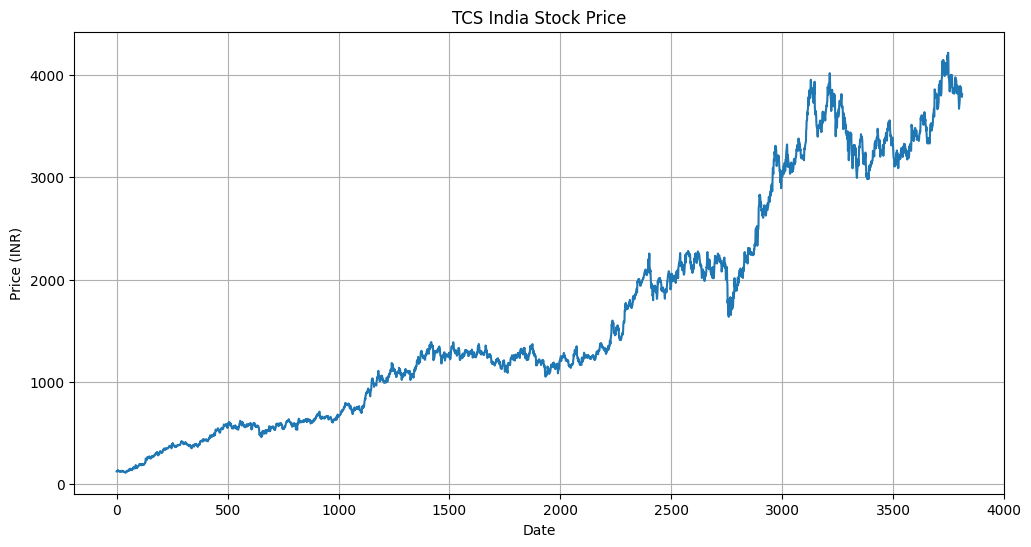

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [57]:
df

,Open,High,Low,Close,Volume
0,124.262497,127.175003,123.537498,124.574997,5375740
1,125.500000,130.750000,124.500000,128.812500,4829776
2,128.750000,130.500000,124.562500,126.599998,5918992
3,129.750000,129.949997,116.150002,126.199997,9013828
4,124.974998,137.449997,121.250000,134.237503,14219980
...,...,...,...,...,...
3807,3889.000000,3889.000000,3828.000000,3832.050049,1860730
3808,3826.050049,3842.000000,3795.050049,3815.100098,1774045
3809,3827.649902,3833.850098,3792.949951,3801.699951,1509050
3810,3796.000000,3809.949951,3780.050049,3787.250000,2846526


In [58]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3807    3942.253506
3808    3941.791506
3809    3940.962505
3810    3939.809004
3811    3938.486003
Name: Close, Length: 3812, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

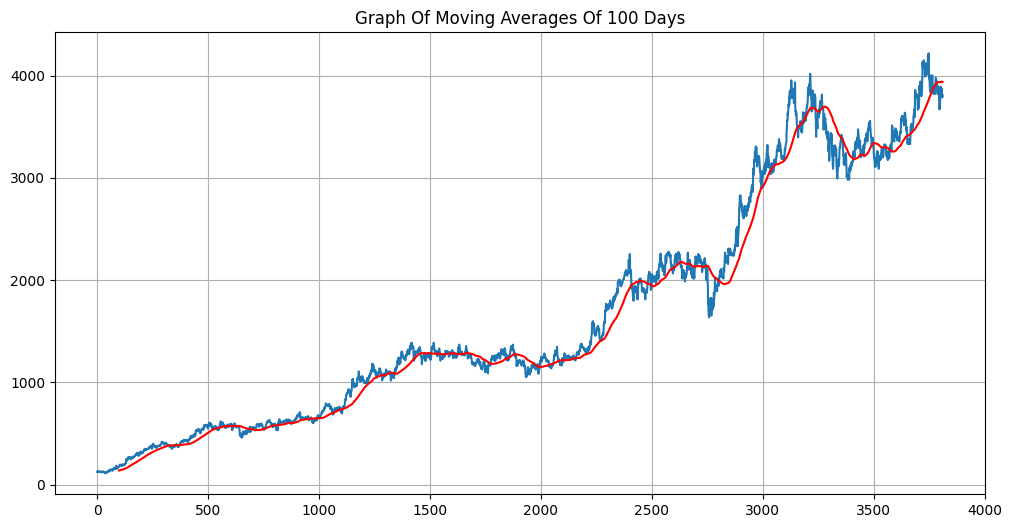

In [59]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [60]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3807    3745.900502
3808    3747.967753
3809    3750.065503
3810    3752.010503
3811    3754.125503
Name: Close, Length: 3812, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

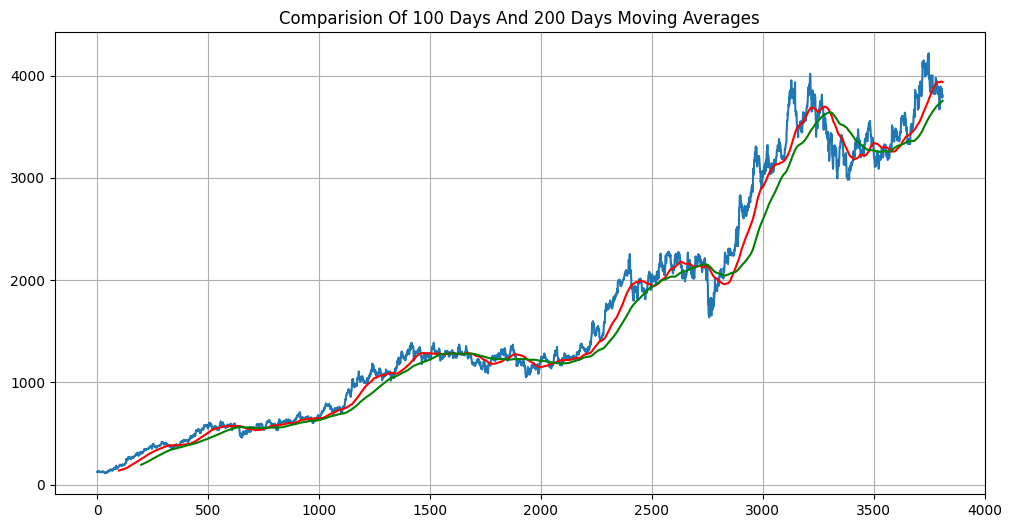

In [61]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [62]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2668, 7)
(1144, 7)


In [63]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,124.262497,127.175003,123.537498,124.574997,92.310806,5375740
1,2009-01-05,125.500000,130.750000,124.500000,128.812500,95.450851,4829776
2,2009-01-06,128.750000,130.500000,124.562500,126.599998,93.811356,5918992
3,2009-01-07,129.750000,129.949997,116.150002,126.199997,93.514946,9013828
4,2009-01-09,124.974998,137.449997,121.250000,134.237503,99.470764,14219980


In [64]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2668,2019-11-07,2204.500000,2204.500000,2175.199951,2185.350098,2001.146240,1915598
2669,2019-11-08,2189.600098,2189.600098,2124.000000,2129.949951,1950.415771,2788759
2670,2019-11-11,2135.000000,2139.000000,2091.000000,2100.949951,1923.860107,2983768
2671,2019-11-13,2118.000000,2183.800049,2118.000000,2178.600098,1994.965332,3823365
2672,2019-11-14,2187.500000,2200.000000,2146.699951,2196.800049,2011.631226,2995915


In [65]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [67]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [68]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00601228],
       [0.00796829],
       [0.00694701],
       ...,
       [0.961226  ],
       [0.96487267],
       [0.95871032]])

In [69]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [70]:
x_train.shape

(2568, 100, 1)

Building the Model

In [71]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [72]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mrinal\OneDrive\Desktop\Stock-Price-Prediction-using-LSTM-FASTAPI-Streamlit\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [74]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 217ms/step - loss: 0.0788 - mean_absolute_error: 0.2037
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - loss: 0.0069 - mean_absolute_error: 0.0606
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - loss: 0.0063 - mean_absolute_error: 0.0573
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - loss: 0.0062 - mean_absolute_error: 0.0548
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - loss: 0.0066 - mean_absolute_error: 0.0575
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - loss: 0.0056 - mean_absolute_error: 0.0540
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - loss: 0.0052 - mean_absolute_error: 0.0493
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - loss: 0.0046 - mean_absolute_error: 0.0480
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - loss: 0.0042 - mean_absolute_error: 0.0459
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - loss: 0.0041 - mean_absolute_error: 0.0431
Epoch 11/

In [75]:
model.save('keras_model.h5')

In [76]:
test_close.shape

(1144, 1)

In [77]:
past_100_days = pd.DataFrame(train_close[-100:])

In [78]:
test_df = pd.DataFrame(test_close)

In [79]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [80]:
print(type(past_100_days))


<class 'pandas.core.frame.DataFrame'>


In [81]:
final_df.head()

,0
0,2252.800049
1,2260.899902
2,2254.100098
3,2254.500000
4,2249.199951


In [82]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.23866587],
       [0.24180182],
       [0.2391692 ],
       ...,
       [0.83834061],
       [0.83274614],
       [0.84184444]])

In [83]:
input_data.shape

(1244, 1)

Testing the Model

In [84]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [85]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1144, 100, 1)
(1144,)


Making Predictions

In [86]:
y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step


In [87]:
y_pred.shape

(1144, 1)

In [88]:
y_test

array([0.21255183, 0.19110301, 0.17987532, ..., 0.83834061, 0.83274614,
       0.84184444])

In [89]:
y_pred

array([[0.22501077],
       [0.22852606],
       [0.2315197 ],
       ...,
       [0.8720033 ],
       [0.8689817 ],
       [0.86340076]], dtype=float32)

In [90]:
scaler.scale_

array([0.00038716])

In [91]:
scale_factor = 1/0.00038716
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

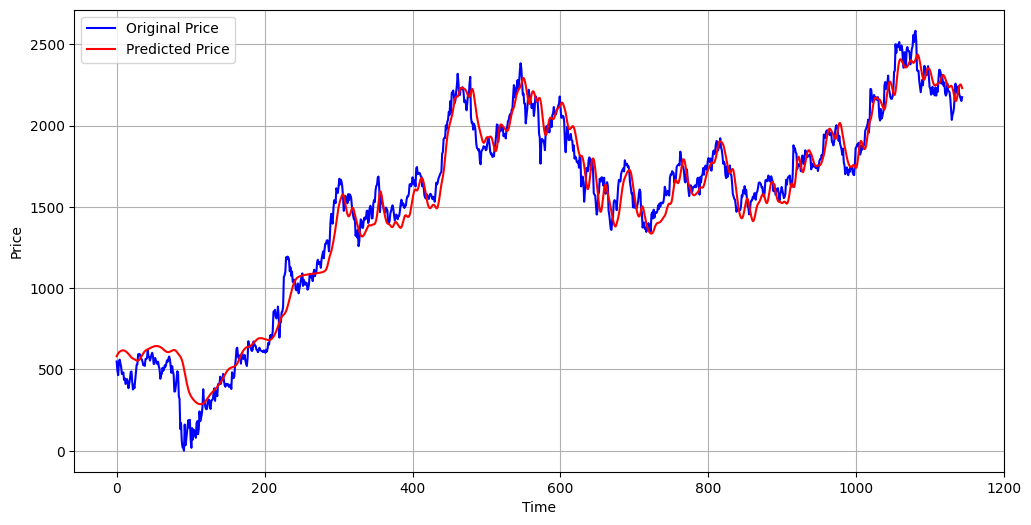

In [92]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Model Evaluation

In [93]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.54%


In [94]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9676476538734726


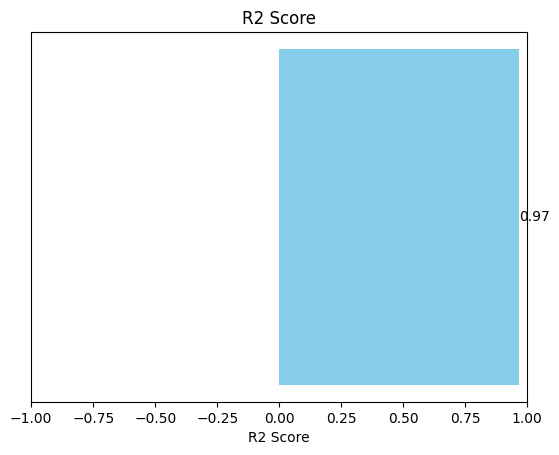

In [95]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

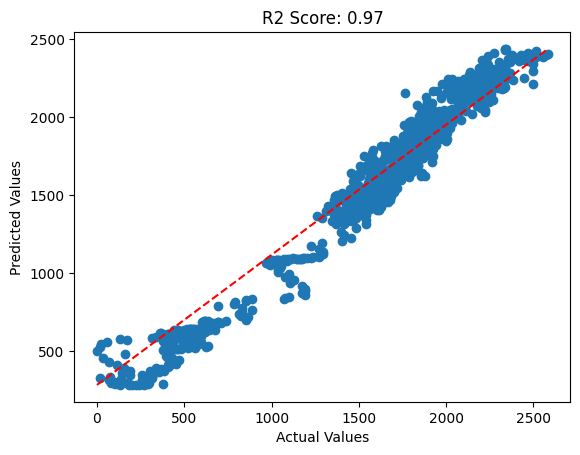

In [96]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()